# Predicting the Likelihood of Marketing Engagement

In this chapter, we are going to expand the knowledge we gained from the previous
chapter and the customer analytics exercise we conducted in Chapter 7, Exploratory
Analysis for Customer Behavior. For successful and more intelligent marketing strategies, we
cannot stop at analyzing customer data. With the advanced technology in data science and
machine learning, we can now make intelligent guesses and estimates on customers' future
behaviors, such as what types of customers are more likely to engage with marketing
efforts, the amount of purchases that customers are likely to make, or which customers are
likely to churn. These predictions or intelligent guesses that are built based on historical
customer data can help you improve your marketing performance and further tailor your
marketing strategies for different target audiences. In this chapter, we are going to learn
how we can utilize data science and machine learning to predict future outcomes and how
this can help your future marketing efforts.
In this chapter, we will cover the following topics:

Predictive analytics in marketing

Evaluating classification models

Applications of predictive analytics in marketing
As briefly mentioned previously, there are numerous ways of applying and utilizing
predictive analytics in marketing. In this section, we are going to discuss four popular use
cases of predictive analytics in marketing:

Likelihood of engagement: Predictive analytics can help marketers forecast the
likelihood of customer engagements with their marketing strategies. For
example, if your marketing happens a lot in the email space, you can utilize
predictive analytics to forecast which customers have a high likelihood of
opening your marketing emails and custom-tailor your marketing strategies to
those high-likelihood customers to maximize your marketing results. For another
example, if you are displaying advertisements on social media, predictive
analytics can help you identify certain types of customers that are likely to click
on the ads.

Customer lifetime value: Predictive analytics can help you forecast the expected
lifetime values of your customers. Using historical transactional data, predictive
analytics can help you identify high-value customers within your customer base.
With these predictions, you and your firm can focus more on building healthy
relationships with those high-value customers. We are going to discuss in
more detail how to build predictive models for customer lifetime value forecasts
in the following chapter.

Recommending the right products and contents: As we have already discussed
in Chapter 6, Recommending the Right Products, we can use data science and
machine learning to predict which customers are likely to purchase products or
view contents. Using these predictions, you can improve customer conversion
rates by recommending the right products and contents for individual customers.

Customer acquisition and retention: Predictive analytics has also been heavily
used for customer acquisition and retention. Based on the profile data you
gathered about your prospects or leads and the historical data of your existing
customers, you can apply predictive analytics to identify high-quality leads or
rank the leads by their likelihood of being converted into active customers. On
the other hand, you can use the customer churn data and the historical data of
your existing customers to develop predictive models to forecast which
customers are likely to leave or unsubscribe from your products. We are going to
discuss in more detail applying predictive analytics for customer retention in
Chapter 11, Retaining Customers.

The second metric that is commonly used for classification problems is precision. Precision
is defined as the number of true positives divided by the total number of true positives and
false positives. True positives are cases where the model correctly predicted as positive,
while false positives are cases where the model was predicted as positive, but the true label
was negative.

In [51]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('/Users/muratbakir/Desktop/Hands_on_Data_Science/Chapter_8/Predicting_Engegament/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [53]:
df.shape

(9134, 24)

In order to build machine learning models using the scikit-learn package in Python, all
the features in the dataset need to have numerical values. However, in the dataset, we have
numerous columns that have non-numerical values. For example, the target variable,
Response, which is what we are going to try to predict with machine learning models, is
non-numeric. It contains two string values—Yes and No. We will need to encode this
Response target variable with numerical values in order to be able to build machine
learning models. For another example, the column Gender, which we can use as one of the
features for our predictive model, also does not have numerical values. It contains two
string values—F for female and M for male. In this section, we are going to discuss how we
can encode these non-numeric columns so that we can use them as features for machine
learning models.

In [54]:
df['Engaged'] = df['Response'].apply(
  lambda x: 1 if x=='Yes' else 0
)

# Features

In [55]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [56]:
continious_features = df.select_dtypes(include='number')
continious_features.columns

continious_features = continious_features.drop('Engaged', axis=1)
continious_features.columns

continious_features = list(continious_features.columns)
continious_features

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [57]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Engaged'],
      dtype='object')

In [58]:
cat_variables = df.select_dtypes(include='object')
cat_variables.columns

cat_variables = cat_variables.drop(['Customer', 'State', 'Response', 'Effective To Date', 'Gender', 'Location Code', 'Renew Offer Type'], axis=1)
columns_to_encode = list(cat_variables.columns)

columns_to_encode

['Coverage',
 'Education',
 'EmploymentStatus',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

- Creating Dummy Variables

In [59]:
categorical_features = []

for col in columns_to_encode:
  encoded_df = pd.get_dummies(df[col])
  encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
  
  categorical_features += list(encoded_df.columns)

  print(encoded_df)

      Coverage.Basic  Coverage.Extended  Coverage.Premium
0                  1                  0                 0
1                  0                  1                 0
2                  0                  0                 1
3                  1                  0                 0
4                  1                  0                 0
...              ...                ...               ...
9129               1                  0                 0
9130               0                  1                 0
9131               0                  1                 0
9132               0                  1                 0
9133               0                  1                 0

[9134 rows x 3 columns]
      Education.Bachelor  Education.College  Education.Doctor  \
0                      1                  0                 0   
1                      1                  0                 0   
2                      1                  0                 0   
3                  

In [60]:

columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)

- Encoding Gender

By now, we have successfully encoded all the categorical variables except Gender. Since we
do not need to create two dummy variables for the Gender column, as there can only be
two genders, we are going to create one variable that contains information about the gender
of a given record.

In [61]:
df['Is.Female'] = df['Gender'].apply(
  lambda x: 1 if x == 'F' else 0
)

categorical_features.append('Is.Female')


- all features & response

In [62]:
all_features = categorical_features + continious_features
response = ['Engaged']

In [63]:
sample_df = df[all_features + response]
sample_df.head()

,Sales.Channel.Agent,Sales.Channel.Branch,Sales.Channel.Call Center,Sales.Channel.Web,Vehicle.Size.Large,Vehicle.Size.Medsize,Vehicle.Size.Small,Vehicle.Class.Four-Door Car,Vehicle.Class.Luxury Car,Vehicle.Class.Luxury SUV,...,Is.Female,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
0,1,0,0,0,0,1,0,0,0,0,...,1,2763.519279,56274,69,32,5,0,1,384.811147,0
1,1,0,0,0,0,1,0,1,0,0,...,1,6979.535903,0,94,13,42,0,8,1131.464935,0
2,1,0,0,0,0,1,0,0,0,0,...,1,12887.431650,48767,108,18,38,0,2,566.472247,0
3,0,0,1,0,0,1,0,0,0,0,...,0,7645.861827,0,106,18,65,0,7,529.881344,0
4,1,0,0,0,0,1,0,1,0,0,...,0,2813.692575,43836,73,12,44,0,1,138.130879,0


In [67]:
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

sample_df.columns


Index(['Sales.Channel.Agent', 'Sales.Channel.Branch',
       'Sales.Channel.Call.Center', 'Sales.Channel.Web', 'Vehicle.Size.Large',
       'Vehicle.Size.Medsize', 'Vehicle.Size.Small',
       'Vehicle.Class.Four-Door.Car', 'Vehicle.Class.Luxury.Car',
       'Vehicle.Class.Luxury.SUV', 'Vehicle.Class.SUV',
       'Vehicle.Class.Sports.Car', 'Vehicle.Class.Two-Door.Car',
       'Policy.Corporate.L1', 'Policy.Corporate.L2', 'Policy.Corporate.L3',
       'Policy.Personal.L1', 'Policy.Personal.L2', 'Policy.Personal.L3',
       'Policy.Special.L1', 'Policy.Special.L2', 'Policy.Special.L3',
       'Policy.Type.Corporate.Auto', 'Policy.Type.Personal.Auto',
       'Policy.Type.Special.Auto', 'EmploymentStatus.Disabled',
       'EmploymentStatus.Employed', 'EmploymentStatus.Medical.Leave',
       'EmploymentStatus.Retired', 'EmploymentStatus.Unemployed',
       'Marital.Status.Divorced', 'Marital.Status.Married',
       'Marital.Status.Single', 'Education.Bachelor', 'Education.College',
       

In [68]:
sample_df.head()

,Sales.Channel.Agent,Sales.Channel.Branch,Sales.Channel.Call.Center,Sales.Channel.Web,Vehicle.Size.Large,Vehicle.Size.Medsize,Vehicle.Size.Small,Vehicle.Class.Four-Door.Car,Vehicle.Class.Luxury.Car,Vehicle.Class.Luxury.SUV,...,Is.Female,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Engaged
0,1,0,0,0,0,1,0,0,0,0,...,1,2763.519279,56274,69,32,5,0,1,384.811147,0
1,1,0,0,0,0,1,0,1,0,0,...,1,6979.535903,0,94,13,42,0,8,1131.464935,0
2,1,0,0,0,0,1,0,0,0,0,...,1,12887.431650,48767,108,18,38,0,2,566.472247,0
3,0,0,1,0,0,1,0,0,0,0,...,0,7645.861827,0,106,18,65,0,7,529.881344,0
4,1,0,0,0,0,1,0,1,0,0,...,0,2813.692575,43836,73,12,44,0,1,138.130879,0


# 3. Training & Testing

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
sample_df[all_features]

,Sales.Channel.Agent,Sales.Channel.Branch,Sales.Channel.Call.Center,Sales.Channel.Web,Vehicle.Size.Large,Vehicle.Size.Medsize,Vehicle.Size.Small,Vehicle.Class.Four-Door.Car,Vehicle.Class.Luxury.Car,Vehicle.Class.Luxury.SUV,...,Coverage.Premium,Is.Female,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
0,1,0,0,0,0,1,0,0,0,0,...,0,1,2763.519279,56274,69,32,5,0,1,384.811147
1,1,0,0,0,0,1,0,1,0,0,...,0,1,6979.535903,0,94,13,42,0,8,1131.464935
2,1,0,0,0,0,1,0,0,0,0,...,1,1,12887.431650,48767,108,18,38,0,2,566.472247
3,0,0,1,0,0,1,0,0,0,0,...,0,0,7645.861827,0,106,18,65,0,7,529.881344
4,1,0,0,0,0,1,0,1,0,0,...,0,0,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,1,0,1,0,1,0,0,...,0,0,23405.987980,71941,73,18,89,0,2,198.234764
9130,0,1,0,0,0,1,0,1,0,0,...,0,1,3096.511217,21604,79,14,28,0,1,379.200000
9131,0,1,0,0,0,1,0,1,0,0,...,0,0,8163.890428,0,85,9,37,3,2,790.784983
9132,0,1,0,0,1,0,0,1,0,0,...,0,0,7524.442436,21941,96,34,3,0,3,691.200000


In [72]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)

In [74]:
sample_df.shape

(9134, 51)

In [75]:
x_train.shape

(6393, 50)

In [77]:
x_test.shape

(2741, 50)

# 3.1. Building RandomForest Model

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf_model = RandomForestClassifier(
  n_estimators=200,
  max_depth=5
)

In [80]:
rf_model.fit(X=x_train, y=y_train)

/var/folders/hn/c6llvp_d7tb8qrb26k5k5r3w0000gn/T/ipykernel_66447/177958661.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X=x_train, y=y_train)


RandomForestClassifier(max_depth=5, n_estimators=200)

In [82]:
rf_model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1397201078),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1142095668),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1620989097),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1144391195),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1296177732),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=723393649),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1514782707),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1277865749),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=488306494),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                    

As you can see from this output, the estimators_ attribute returns a list of sub-estimators,
which are decision trees. With this information, you can simulate what each of these subestimators
predicts for each input. For example, the following code shows how you can get
the predictions from the first sub-estimator in the forest:

In [86]:
rf_model.estimators_[0].predict(x_test)[:10]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

- Feature Importances

In [87]:
rf_model.feature_importances_

array([0.0380885 , 0.00706421, 0.00748577, 0.0072867 , 0.00535418,
       0.00733831, 0.00722551, 0.0048379 , 0.00057168, 0.00319029,
       0.00489825, 0.00392464, 0.00285977, 0.00080033, 0.00094722,
       0.00157072, 0.00206646, 0.00092497, 0.00106721, 0.0011446 ,
       0.00035218, 0.00237273, 0.00084793, 0.00147378, 0.0010728 ,
       0.00484281, 0.02766217, 0.00415086, 0.31686938, 0.02429388,
       0.03285911, 0.01916019, 0.02107447, 0.00456822, 0.00438618,
       0.00421099, 0.00323144, 0.00563032, 0.00425703, 0.00460077,
       0.00410044, 0.00485962, 0.05323584, 0.08746234, 0.05518155,
       0.03187389, 0.05536841, 0.01393983, 0.02164409, 0.07576949])

In [90]:
feature_importance_df = pd.DataFrame(
  list(zip(rf_model.feature_importances_, all_features))
)

feature_importance_df.columns = ['feature.importance', 'feautres']
feature_importance_df = feature_importance_df.sort_values(by='feature.importance', ascending=False)

feature_importance_df


,feature.importance,feautres
28,0.316869,EmploymentStatus.Retired
43,0.087462,Income
49,0.075769,Total.Claim.Amount
46,0.055368,Months.Since.Policy.Inception
44,0.055182,Monthly.Premium.Auto
42,0.053236,Customer.Lifetime.Value
0,0.038089,Sales.Channel.Agent
30,0.032859,Marital.Status.Divorced
45,0.031874,Months.Since.Last.Claim
26,0.027662,EmploymentStatus.Employed


As you can see from this output, the EmploymentStatus.Retired feature seems to be the
most important factor in making the final prediction and the Income,
Total.Claim.Amount, and Customer.Lifetime.Value features follow as the second,
third, and fourth most important features.

# 3.2. Evaluating Models

- Accuracy, Precision, and Recal

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Before we go ahead and evaluate the model performance, we will need the model
prediction results. In order to have the random forest model we have built in the previous
section to make predictions on a dataset, we can simply use the predict function of the
model.

In [92]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [99]:
print(f"In-sample accuracy: {accuracy_score(y_train, in_sample_preds):.4f}")
print(f"Out sample accuracy: {accuracy_score(y_test, out_sample_preds):.4f}")

In-sample accuracy: 0.8788
Out sample accuracy: 0.8723


In [100]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9859
Out-of-Sample Precision: 0.9787


In [101]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1533
Out-of-Sample Recall: 0.1165


- ROC & AUC

In [102]:
from sklearn.metrics import roc_curve, auc

The roc_curve function in the metrics module of the scikit-learn package computes
the ROC, and the auc function computes the AUC. In order to compute the ROC and AUC
using these functions, we need to first get the prediction probabilities from our random
forest model.

In [103]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

As you can see from this code, we are using the predict_proba function of the random
forest model, rf_model. This function outputs the predicted probabilities of the given
record belonging to each class. Since we only have two possible classes in our case, 0 for no
responses and 1 for responses, the output of the predict_proba function has two
columns, where the first column represents the predicted probability of a negative class,
meaning no response for each record, and the second column represents the predicted
probability of a positive class, meaning a response for each record. Since we are only
interested in the likelihood of responding to the marketing effort, we can take the second
column for the predicted probabilities of the positive class.

In [104]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [105]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8938
Out-Sample AUC: 0.8743


Depending on the hyperparameters and the randomness within the random forest
algorithm, your AUC numbers can look different from these examples. However, in our
case, the in-sample train set AUC was 0.89 and the out-of-sample test set AUC was
0.87. If you see a big gap between these two numbers, it is a sign of overfitting and you
should try to address it by pruning the trees in the forest by tuning the hyperparameters,
such as the maximum depth and minimum number of samples to split.

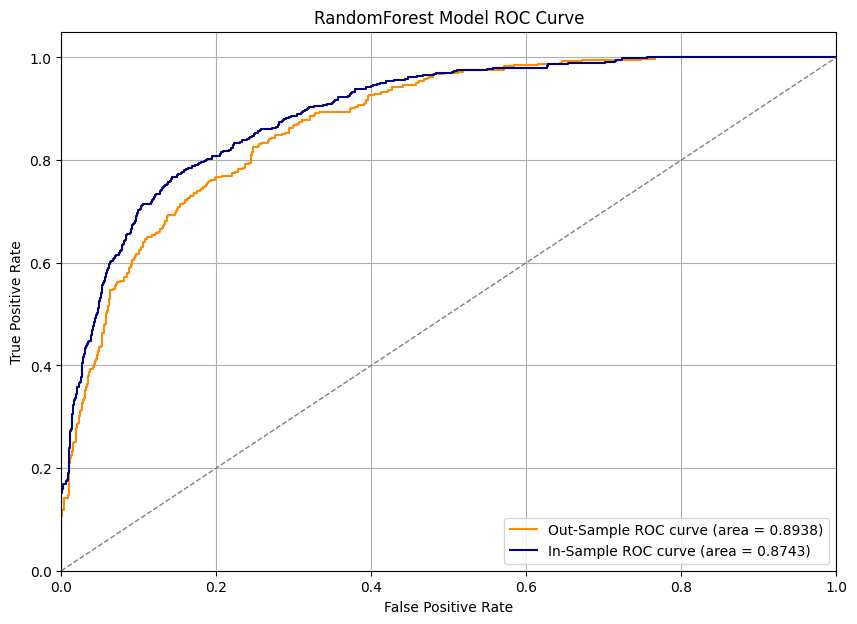

In [106]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

As you can see from this plot, it is easier to see and compare the overall performance of the
model between the train and test sets with ROC curves. The larger the gap between the insample
ROC curve and the out-of-sample ROC curve, the more the model is overfitting to
the train set and fails to generalize the findings for unforeseen data.